## Week 9
### Coupled carbon model
We will include land and ocean sinks and allow the rate of respiration to change with temperature

Relevant equations from last time

\begin{equation*}
C_b(t) = C_b(t-1) + (NPP - R_h)
\end{equation*}


\begin{equation*}
NPP(t) = NPP(0) [ 1+\beta \ln \frac {CO_2(t)}{CO_2(0)} ]
\end{equation*}



In [2]:
import numpy as np
import matplotlib.pyplot as py

Read in the historical CO2 data

In [15]:
filedata = np.loadtxt('ObsCO2.txt', skiprows=1, delimiter='\t')
dateCO2 = filedata[:,0]
CO2obs = filedata[:,1]

In [16]:
print('start date', dateCO2[0], 'end date', dateCO2[-1])

start date 1765.0 end date 2005.0


Read in the historical and projected fossil fuel emissions

In [9]:
filedata = np.loadtxt('Fossilhistandrcp85.txt', skiprows=1, delimiter='\t')
date = filedata[:,0]
ff = filedata[:,1]
print('start date', date[0], 'end date', date[-1])

start date 1765.0 end date 2100.0


In [11]:
nyears = len(date)
print('number of years', nyears)

number of years 336


#### Initialize the model, this time with both Cb and Ca

Assume that we started at steady state. In 1765, dC/dt = 0 = npp - rh

Cb = npp*tau

In [12]:
Cb = np.zeros(nyears)
Ca = np.zeros(nyears)

Tp = np.zeros(nyears)
npp = np.zeros(nyears)
rh = np.zeros(nyears)

npp_initial = 50 #units PgC/yr
taub = 20 #units years, initial turnover time for biosphere. Tweak this
beta = 0.6 #sensitivity of NPP to CO2
dt = 1.0 #time increment in years
alpha = 0.0066 #K/ppm sensitivity of T to change in CO2 ppm
ppmtoPgC = 2.1 #conversion, 1 ppm CO2 = 2.1 PgC

#initial conditions
Cb[0] = npp_initial*taub
Ca[0] = 280*ppmtoPgC
Tp[0] = 15.0
npp[0] = npp_initial
rh[0] = npp_initial

Run the model (just the atmospheric carbon and temperature for now)

In [13]:
for t in range(1, nyears):  #starting at 1766
    Ca[t] = Ca[t-1] + ff[t]*dt
    Tp[t] = Tp[0] + alpha*(Ca[t-1]-Ca[0])/ppmtoPgC
    
    
CO2model = Ca/ppmtoPgC

#print('Land carbon accumulation', -1*np.sum(Fland))

Plot

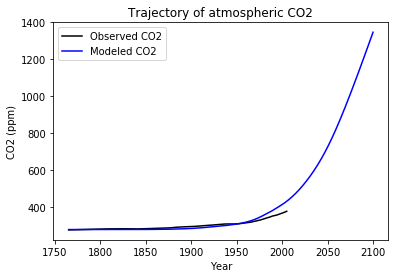

In [19]:
fig = py.figure(1)
py.plot(dateCO2, CO2obs, color='black', label='Observed CO2')
py.plot(date, CO2model, color='blue', label='Modeled CO2')
py.xlabel('Year')
py.ylabel('CO2 (ppm)')
py.title('Trajectory of atmospheric CO2')
py.legend()

Our model doesn't include the land sink for carbon, so our observed CO2 is lower than the model

Text(0.5, 1.0, 'Trajectory of global temperature')

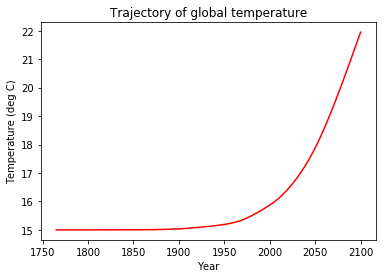

In [21]:
fig = py.figure(2)
py.plot(date, Tp, color='red', label='Modeled Temperature')
py.xlabel('Year')
py.ylabel('Temperature (deg C)')
py.title('Trajectory of global temperature')

If we didn't have sinks for carbon, warming would be 7 degrees by 2100

### Day 2: See Python script coupledmodelv4.py
includes coupling with ocean and land

line 108: depth of ocean should be 3800